In [1]:
#Use decision trees to prepare a model on fraud data 
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#Data Description :

#Undergrad : person is under graduated or not
#Marital.Status : marital status of a person
#Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
#Work Experience : Work experience of an individual person
#Urban : Whether that person belongs to urban area or not

In [2]:
## Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [ ]:
df = pd.read_csv('/content/Fraud_check.csv')

In [ ]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
Df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [ ]:
Df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [ ]:
Df['Taxable.Income']

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [ ]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
Df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [ ]:
Df

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [ ]:
Df['TaxInc'].value_counts()

Good     476
Risky    124
Name: TaxInc, dtype: int64

In [ ]:
DF= pd.get_dummies(Df,columns=['TaxInc'],drop_first=True)

In [ ]:
DF

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [ ]:
DF=DF.rename({'Marital.Status_Married': 'MaritalStatus_Married','Marital.Status_Single':'MaritalStatus_Single','Taxable.Income':'TaxableIncome','City.Population':'CityPopulation','Work.Experience':'WorkExperience'}, axis=1)

In [ ]:
DF

,TaxableIncome,CityPopulation,WorkExperience,Undergrad_YES,MaritalStatus_Married,MaritalStatus_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   TaxableIncome          600 non-null    int64
 1   CityPopulation         600 non-null    int64
 2   WorkExperience         600 non-null    int64
 3   Undergrad_YES          600 non-null    uint8
 4   MaritalStatus_Married  600 non-null    uint8
 5   MaritalStatus_Single   600 non-null    uint8
 6   Urban_YES              600 non-null    uint8
 7   TaxInc_Good            600 non-null    uint8
dtypes: int64(3), uint8(5)
memory usage: 17.1 KB


In [ ]:
DF['TaxInc_Good'].value_counts()

1    476
0    124
Name: TaxInc_Good, dtype: int64

In [ ]:
x=DF.iloc[:,0:7]
y=DF['TaxInc_Good']

In [ ]:
x

,TaxableIncome,CityPopulation,WorkExperience,Undergrad_YES,MaritalStatus_Married,MaritalStatus_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TaxInc_Good, Length: 600, dtype: uint8

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [ ]:
x_train

,TaxableIncome,CityPopulation,WorkExperience,Undergrad_YES,MaritalStatus_Married,MaritalStatus_Single,Urban_YES
121,20391,86648,16,1,1,0,1
263,70712,69386,21,1,1,0,1
197,66905,98056,4,0,0,1,1
93,15296,137676,3,1,1,0,1
74,32434,182319,17,0,0,0,0
...,...,...,...,...,...,...,...
218,57794,38091,19,0,1,0,0
223,38374,192297,17,1,1,0,1
271,42254,183682,20,0,0,1,0
474,99128,80729,0,1,0,0,0


In [ ]:
x_test

,TaxableIncome,CityPopulation,WorkExperience,Undergrad_YES,MaritalStatus_Married,MaritalStatus_Single,Urban_YES
493,17183,103226,29,0,1,0,0
172,13068,52819,23,0,1,0,1
352,15627,72115,16,0,0,0,1
506,23884,111105,8,0,0,1,1
595,76340,39492,7,1,0,0,1
...,...,...,...,...,...,...,...
536,40674,157025,14,0,0,1,0
422,99311,191983,14,0,0,0,1
191,70819,176341,7,0,0,1,1
21,14310,29106,7,1,0,0,1


In [ ]:
y_train

121    0
263    1
197    1
93     0
74     1
      ..
218    1
223    1
271    1
474    1
355    1
Name: TaxInc_Good, Length: 480, dtype: uint8

In [ ]:
y_train.value_counts()

1    382
0     98
Name: TaxInc_Good, dtype: int64

In [ ]:
y_test

493    0
172    0
352    0
506    0
595    1
      ..
536    1
422    1
191    1
21     0
105    1
Name: TaxInc_Good, Length: 120, dtype: uint8

In [ ]:
y_test.value_counts()

1    94
0    26
Name: TaxInc_Good, dtype: int64

# Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

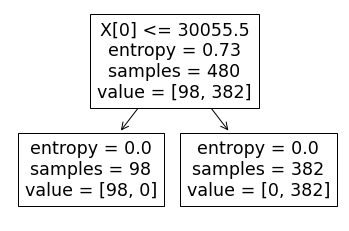

In [ ]:
#PLot the decision tree
tree.plot_tree(model);

In [ ]:
x.columns

Index(['TaxableIncome', 'CityPopulation', 'WorkExperience', 'Undergrad_YES',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Urban_YES'],
      dtype='object')

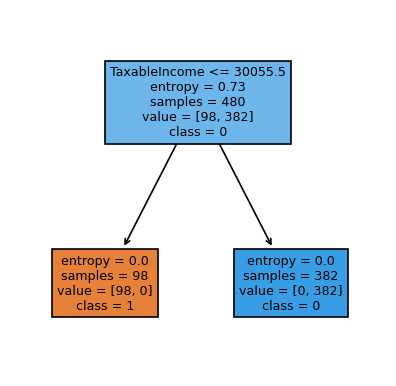

In [ ]:
fn=['TaxableIncome','CityPopulation','WorkExperience','Undergrad_YES','MaritalStatus_Married', 'MaritalStatus_Single', 'Urban_YES']
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=120)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1    94
0    26
dtype: int64

In [ ]:
preds

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
TaxInc_Good,,
0,26,0
1,0,94


In [ ]:
preds==y_test

159    True
307    True
253    True
528    True
137    True
       ... 
102    True
577    True
18     True
560    True
62     True
Name: TaxInc_Good, Length: 120, dtype: bool

In [ ]:
# Accuracy 
np.mean(preds==y_test)

1.0

In [ ]:
model.score(x_train,y_train)

1.0

# Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
array = df.values
X = array[:,[2,3,4]]
Y= array[:,5:]

In [ ]:
X

array([[68833, 50047, 10],
       [33700, 134075, 18],
       [36925, 160205, 30],
       ...,
       [47334, 154058, 0],
       [98592, 180083, 17],
       [96519, 158137, 16]], dtype=object)

In [ ]:
Y

array([['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['NO'],
       ['YES'],
       ['YES'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['NO'],
       ['YES'],
       ['NO'],
     

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
Model = DecisionTreeRegressor()
Model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Find the accuracy
Model.score(X_test,y_test)
## here we used score which is the accuracy for regression problem

1.0